# UDEMY COURSES DATASET

**The dataset was got from kaggle** 

**Udemy is a Massive Online Open Course website, where you can engage in free self paced courses as well as purchase certified courses to learn from a wide range of topics. In this notebook, I will be exploring the dataset and to begin with I have a few questions in my mind!**

  **- -  What might be the most popular course in terms of number of subscribers and number of reviews?**
 
  **- -  What are the most popularly known and enrolled subjects?**
 
  **- -  Is there a relationship between the price of the course to number of subscribers?**

In [2]:
# import all necessary packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import warnings

In [6]:
# importing data to dataframe
df = pd.read_csv(r'C:\Users\Nandhitha\Desktop\projects\udemy EDA\udemy_courses.csv')

In [7]:
df.shape

(3678, 12)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
course_id              3678 non-null int64
course_title           3678 non-null object
url                    3678 non-null object
is_paid                3678 non-null bool
price                  3678 non-null int64
num_subscribers        3678 non-null int64
num_reviews            3678 non-null int64
num_lectures           3678 non-null int64
level                  3678 non-null object
content_duration       3678 non-null float64
published_timestamp    3678 non-null object
subject                3678 non-null object
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [140]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,year
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517,2015.431213
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840,1.185317
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000,2015.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000,2016.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000,2016.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000


In [123]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

#  Which is the most popular course corresponding to number of subscribers and number of reviews?

In [124]:
# finding the course with highest number of subscribers
df.loc[df.num_subscribers.idxmax()]

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                                  0
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                                    10.5
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 2827, dtype: object

In [125]:
# finding the course the highest number of reviews
df.loc[df.num_reviews.idxmax()]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                                200
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                      43
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
Name: 3230, dtype: object

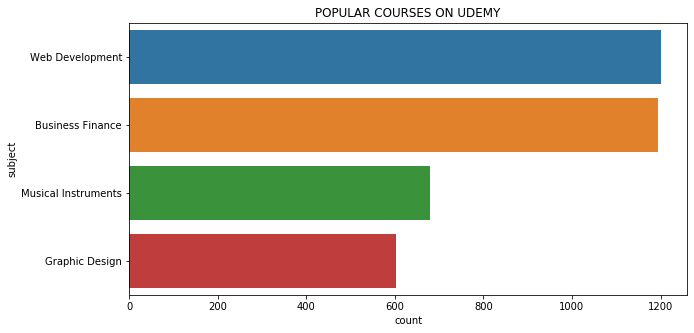

In [126]:
# plot to visualize the more popular subjects
plt.figure(figsize = (10,5))
sns.countplot(y = df.subject, data = df, order = df.subject.value_counts().index)
plt.title("POPULAR COURSES ON UDEMY")
plt.show()

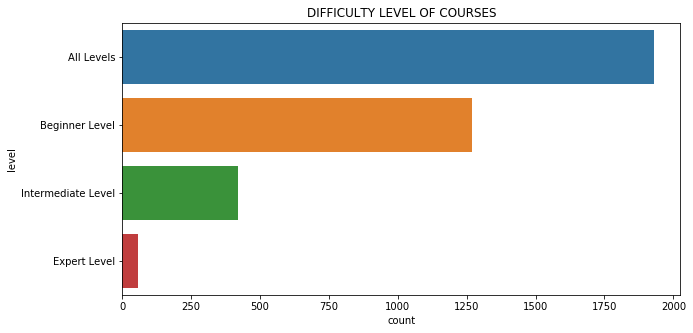

In [127]:
# plot to visualize the courses with respect to levels
plt.figure(figsize = (10,5))
sns.countplot(y = df.level, data = df, order = df.level.value_counts().index)
plt.title("DIFFICULTY LEVEL OF COURSES")
plt.show()

The most subscribed course is a free beginners course for learning HTML5 from scratch, with 268923 subscribers. The most reviewed course is a paid Web Dev Bootcamp which has 121584 subscribers.

We see that people tend to prefer and learn web development courses mostly, may because it a favourite domain of expetise to many of them. And they also prefer Business finance courses as much as they prefer web development courses. Most of the people do not select a course that is too difficult to comprehend, however we can see that people tend to gradually increase their learning by enrolling into courses that offers all the levels of difficulties!

# Do paid courses get more reviews than free courses?

In [8]:
# data cleaning - standardize True and False
df['is_paid'] = df['is_paid'].replace('TRUE', 'True')
df['is_paid'] = df['is_paid'].replace('FALSE', 'False')

In [14]:
count = df.is_paid.value_counts()
count

True     3368
False     310
Name: is_paid, dtype: int64

In [10]:
df.groupby(['is_paid']).mean()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.00000,11533.951613,425.929032,21.416129,2.210753
True,674547.600950,72.12886,2429.808492,131.437945,41.829276,4.267904


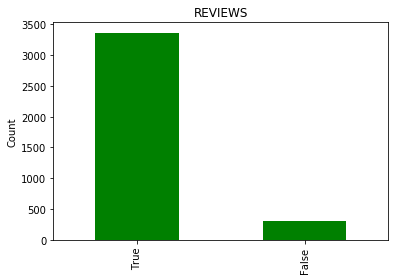

In [17]:
count.plot(kind ='bar', color ='green')
plt.ylabel('Count')
plt.title('REVIEWS');


Well, that can be obvious! 

As most of the people prefer free courses, there are more reviews on the free courses on average than paid courses! It is also interesting to know that paid courses have more lectures than the free ones which nakes the content duration less in free courses.

# How does price of a course have effect on the buyer?

In [19]:
# data cleaning
df.price = df.price.replace('Free', 0)
element = df[df.price == 'TRUE'].index
df.drop(element, inplace = True, axis = 0)
df.price = pd.to_numeric(df['price'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Text(0.5, 0, 'Price in USD')

<Figure size 432x288 with 0 Axes>

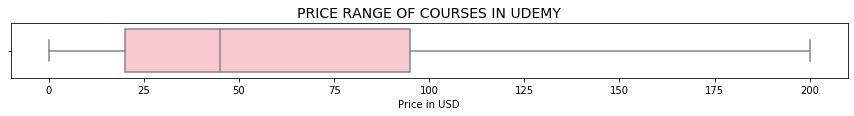

In [21]:
# boxplot to visualize the range of price (USD) in udemy courses
plt.figure()
plt.subplots(figsize = (15,1))
sns.boxplot(x = df.price, data = df, color = 'pink')
plt.title('PRICE RANGE OF COURSES IN UDEMY',fontsize = 14)
plt.xlabel('Price in USD')

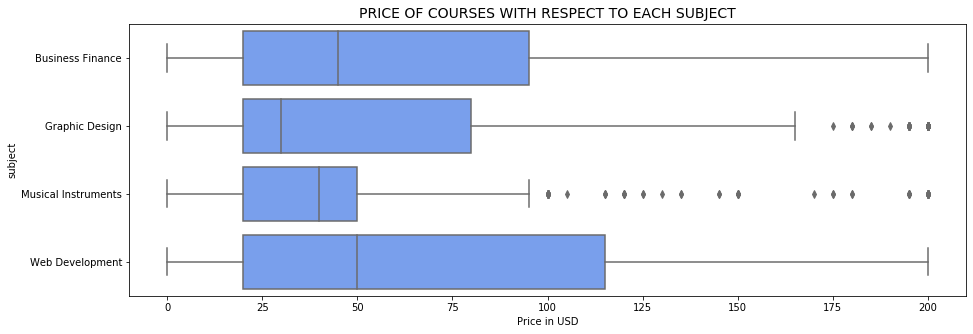

In [150]:
# boxplots to visualize price (USD) of courses with respect to each subject
plt.subplots(figsize = (15,5))
sns.boxplot(x = df.price, y = df.subject, data = df, color="#6698FF")
plt.title('PRICE OF COURSES WITH RESPECT TO EACH SUBJECT',fontsize = 14)
plt.xlabel('Price in USD') #I am assuming all prices are in USD
plt.show()

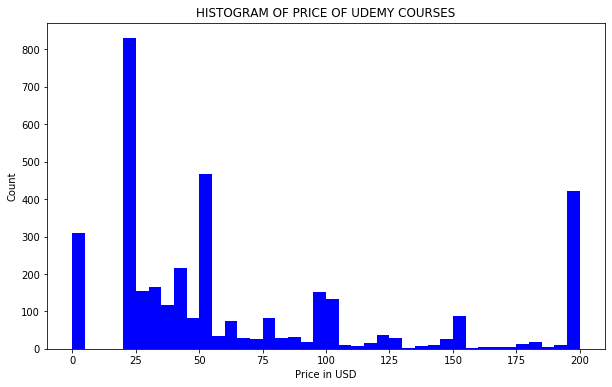

In [134]:
# histogram that shows the price range of courses
plt.figure(figsize = (10,6))
plt.hist(x= df.price, bins = 40, color = 'blue')
plt.title('HISTOGRAM OF PRICE OF UDEMY COURSES')
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.show()

It seems that the average price of a course in udemy is little less than 50 USD. The price of a course on udemy can range from nearly 20 USD to 95 USD.

Web Development courses have the largest interquartile range in price whereas Music courses have the lowest interquatile range in price. The Graphic Design courses has the lowest average prices whereas the Web development course show to have a maximum price of 115 USD.

# Insights related to the creation of new courses every year 

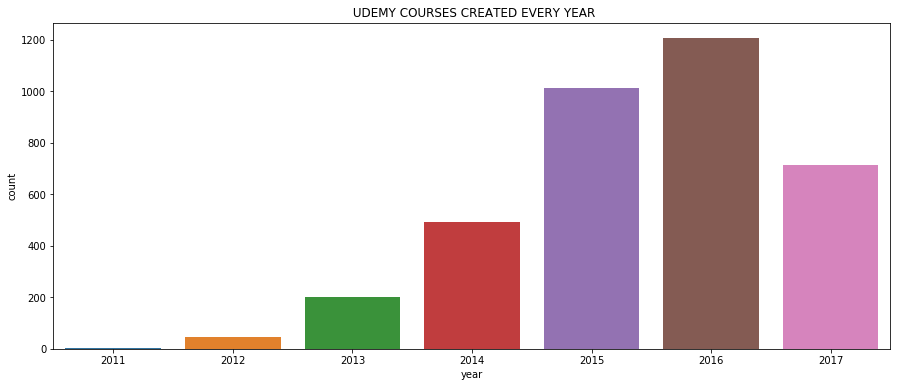

In [153]:
# plot to visualize the creation of new courses every year
df['year'] = pd.to_datetime(df.published_timestamp).dt.year
plt.figure(figsize = (15,6))
sns.countplot(x = df.year, data = df)
plt.title(" UDEMY COURSES CREATED EVERY YEAR")
plt.show()

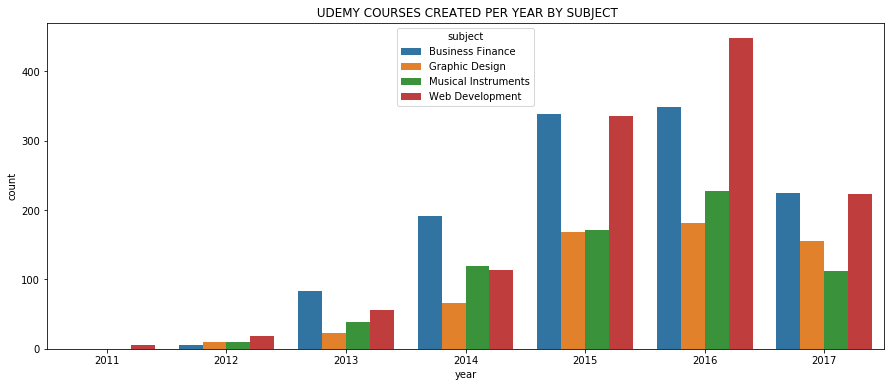

In [154]:
# plot to show the creation of new courses every year with respect to subject
plt.figure(figsize = (15,6))
sns.countplot(x = df.year, data = df, hue = df.subject)
plt.title(" UDEMY COURSES CREATED PER YEAR BY SUBJECT")
plt.show()

The trend seems to have a increasing pattern mostly, with a mercurial drop in the year 2017. 2016 has been the year where maximum nymber of new courses were created, may be because it was the period when online learning came into everyday practice. 

# What can we say about relationship between price and difficulty levels?

In [141]:
price_category=[]
for i in df['price']:
    if i==0:
        price_category.append('Free')
    elif i>0 and i<=45:
        price_category.append('cheap')
    elif i>45 and i<=95:
        price_category.append('expensive')
    else:
        price_category.append('very expensive')
df['price_category']=price_category
df['price_category'].value_counts()

cheap             1566
expensive          946
very expensive     856
Free               310
Name: price_category, dtype: int64

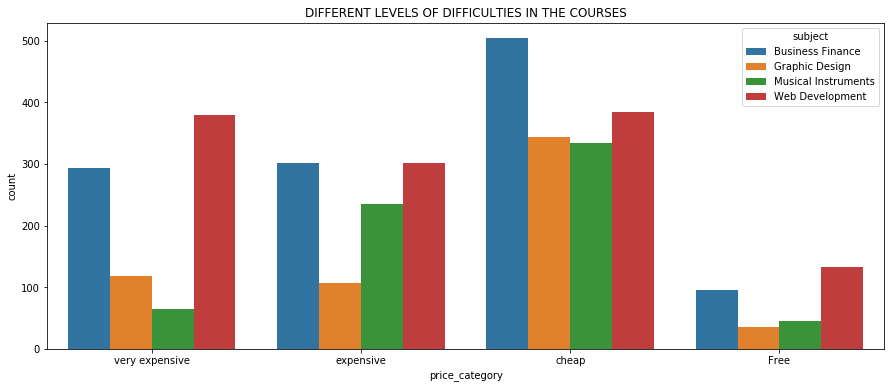

In [155]:
# plot to distinguish the difficult levels in courses
plt.figure(figsize = (15,6))
sns.countplot(x = df['price_category'], data = df, hue = df.subject)
plt.title("DIFFERENT LEVELS OF DIFFICULTIES IN THE COURSES")
plt.show()

We can see that more number of subscribers enrolled in paid courses that were found to be affordable and cheap. We can also notice thet people were interested to buy courses that were very expensive only in the Web Development area. Also, notice that as the price increases, enrolment is likely to decrease and vice versa.

# CONCLUSION

**--  It is seen that learners are more prone to enrol in free courses. If they opt to choose paid courses, the prefer to ivest in courses having low prices than the expensie ones.**

**--  Also, learners utilize the online course platform to develop their web development skills mostly, and also other technology related courses rather that others.**

**-- As learners are more interested in free courses, the reviews for these course seem to be more than the reviews for the paid courses.**

**-- The creation of new technologies courses was many in number in the year 2016 compared to other years, this may be due to the online learning culture among learners.**

**-- The cost of a course on Udemy ranges from 20 USD to nearly 90 USD. And also courses on Web development seem to have the largest interquartile range where courses on musical instruments has the least**
